# Workshop i Machine Learning
### Af Mikkel Mødekjær MIM@unf.dk

Det er lavet til workshop hos UNF

## Scikit-learn

Vi vil bruge pakken `scikit-learn` til tingene idag, for træ'er ville jeg enten bruge `xgboost`, `catboost`, `lightgbm`, `scikit-learn` eller `verstack`. Hvor til netværk ville jeg bruge `tensorflow` eller `pytorch`. Da det er alle store pakken gennemgår vi kun scikit-learn så I kan lære en måde at gøre det på, og det er mere fordi de andre kan mere, imodsætning til at være bedre.

Her importere data for blomster som kan vudere typen af

## Træ'er

In [1]:
from sklearn.datasets import load_iris, load_digits, load_wine, make_classification, load_diabetes, make_regression
from sklearn.model_selection import train_test_split
from sklearn import ensemble, tree
import matplotlib.pyplot as plt

In [2]:
X, y = load_iris(return_X_y=True)
X_iris_train, X_iris_test, y_iris_train, y_iris_test = train_test_split(X,y, test_size=0.2)

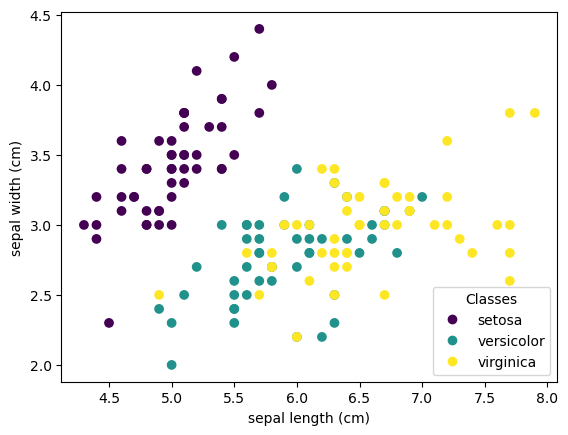

In [3]:
iris = load_iris()
_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

Nu prøver vi at bruge et træ til at classificere typen

In [4]:
clf = tree.DecisionTreeClassifier(max_depth=3, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=5)
clf = clf.fit(X_iris_train, y_iris_train)

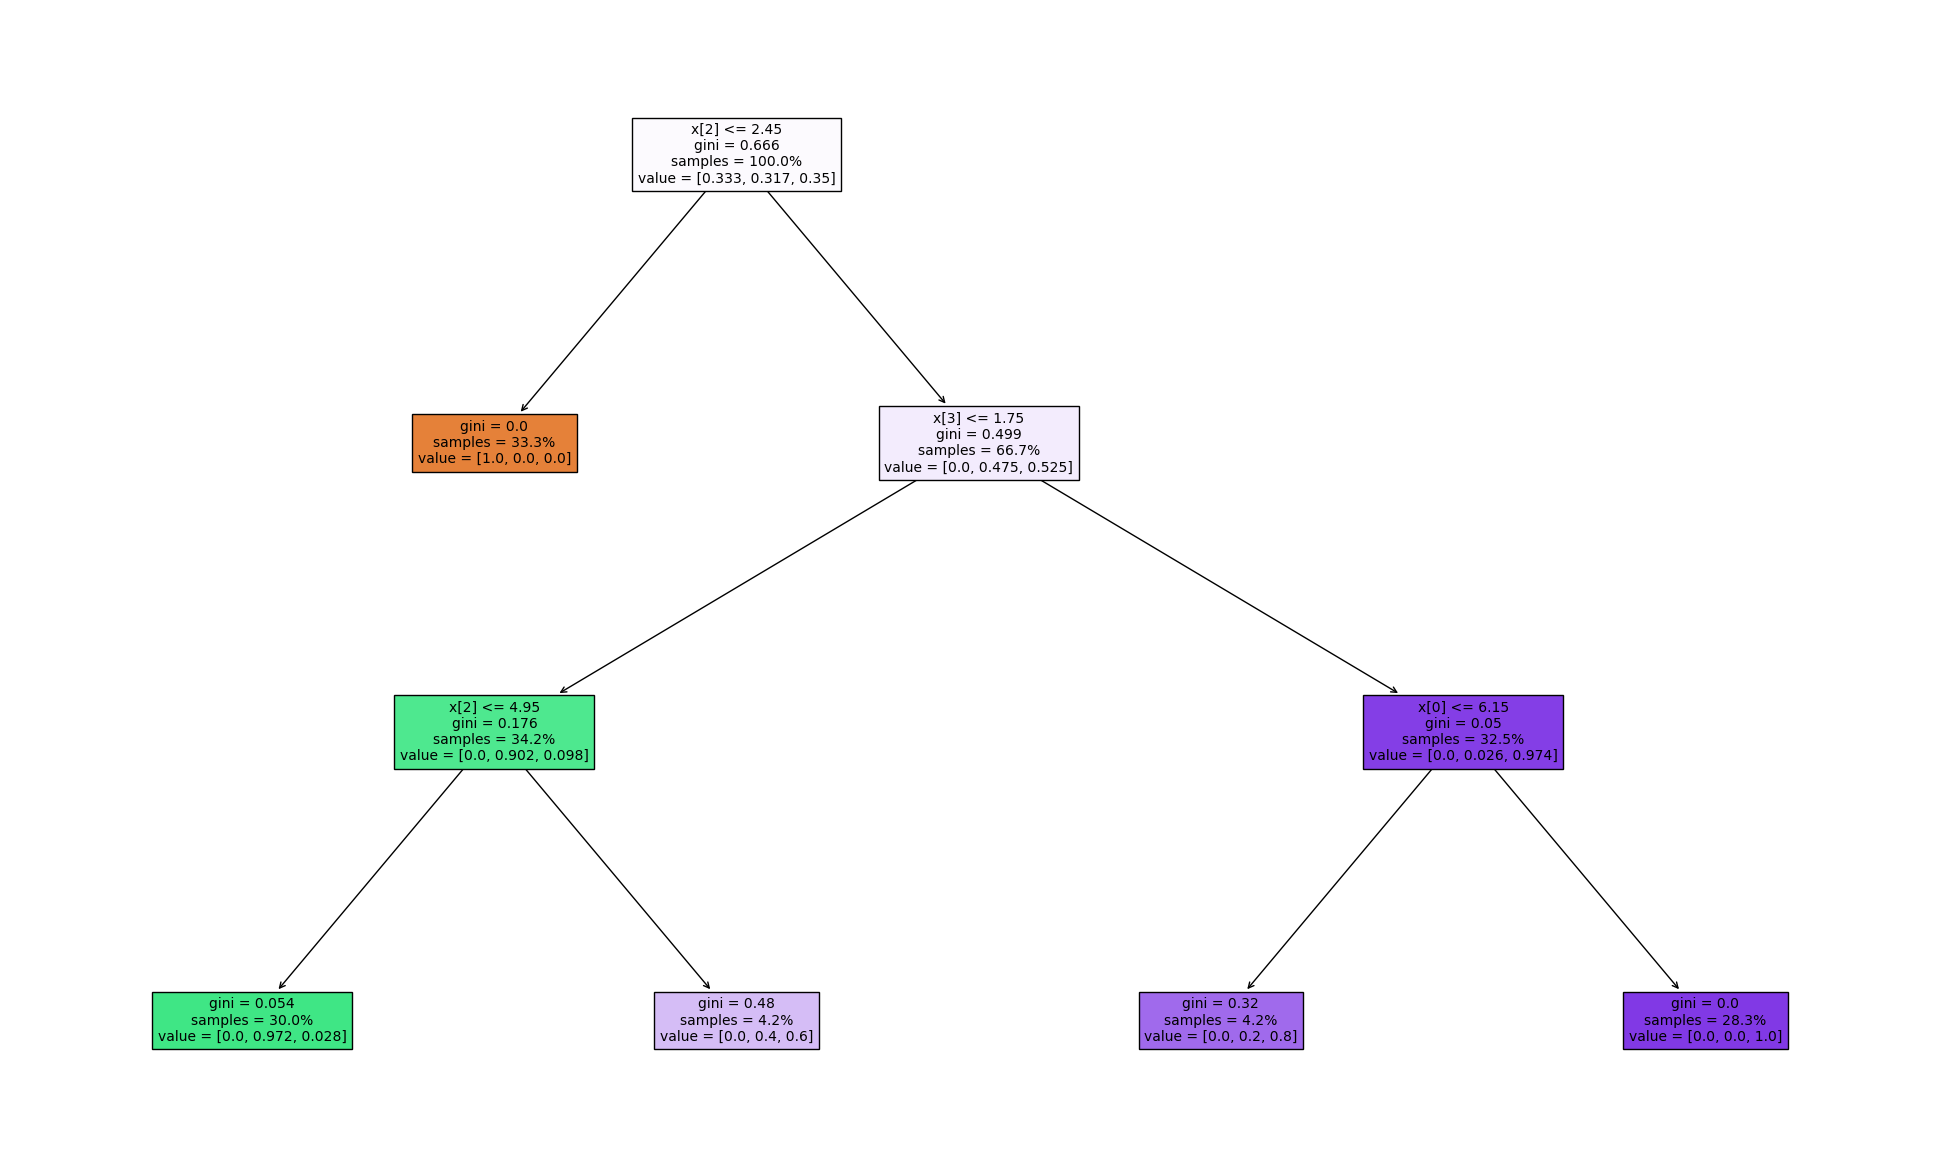

In [5]:
fig, ax = plt.subplots(figsize=(25,15))
tree.plot_tree(clf, proportion=True, filled=True, fontsize=10, ax=ax);

In [6]:
clf.score(X_iris_test, y_iris_test)

1.0

## Opgaver I træer

Prøv at bruge træer til at Klasifisere de tre data set omkring vin, tal og simuleret data.

In [7]:
X, y = load_wine(return_X_y=True)
X_wine_train, X_wine_test, y_wine_train, y_wine_test = train_test_split(X,y, test_size=0.2)

In [8]:
X, y = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

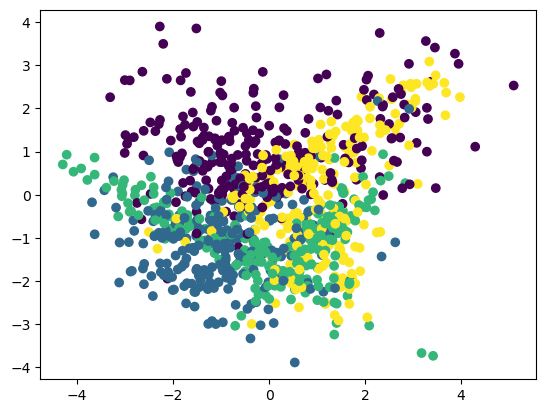

In [9]:
X, y = make_classification(n_samples=1_000_000, n_features=7, n_informative=4, n_redundant=0, random_state=0, n_classes=4, shuffle=False)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

feature_1 = 0
feature_2 = 3
plt.scatter(X_train[:1000,feature_1], X_train[:1000,feature_2], c=y_train[:1000])
plt.show();

## Random Forest

Random forest er en måde at komme mod nogle af de problemer som træer ofte kan vise som overfitting og høj varians.

In [10]:
clf = ensemble.RandomForestClassifier(n_estimators=100, max_depth=10, max_leaf_nodes=50, min_samples_leaf=1, min_samples_split=2)
clf = clf.fit(X_iris_train, y_iris_train)

In [11]:
clf.score(X_iris_test, y_iris_test)

1.0

## Opgave

Leg lidt med random forest og prøv at se om du kan klassifiser datasetne fra før bedre

## Neurale Netværk

In [12]:
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.svm import LinearSVC, LinearSVR

In [13]:
clf = MLPClassifier(hidden_layer_sizes=(100, 50, 50), max_iter=1000, activation="relu", alpha=0.0001, batch_size=10, learning_rate_init=0.001, random_state=0)
clf.fit(X_iris_train, y_iris_train)

MLPClassifier(batch_size=10, hidden_layer_sizes=(100, 50, 50), max_iter=1000,
              random_state=0)

In [14]:
clf.score(X_iris_test, y_iris_test)

1.0

In [15]:
clf = LinearSVC(max_iter=1000)
clf.fit(X_iris_train, y_iris_train)

/nix/store/kp87v5j0yf6m5ya89g7wg0yx53vjp2df-python3-3.11.8-env/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/nix/store/kp87v5j0yf6m5ya89g7wg0yx53vjp2df-python3-3.11.8-env/lib/python3.11/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [16]:
clf.score(X_iris_test, y_iris_test)

1.0

## Opgave

Prøv de neural netværk om du kan få dem til at være bedre en træerne

## Regression

Machine Learning kan også bruges til at forudsige hvad værdien, og det er med regrassion modeller

### Modeller

In [17]:
reg = tree.DecisionTreeRegressor(max_depth=4,min_samples_leaf=5)
reg = ensemble.RandomForestRegressor(n_estimators=100, max_depth=10, max_leaf_nodes=50, min_samples_leaf=1)
reg = MLPRegressor(hidden_layer_sizes=(100, 50, 50), max_iter=1000, activation="relu", alpha=0.0001, batch_size=10, learning_rate_init=0.001, random_state=0)
reg = LinearSVR(max_iter=1000)

In [18]:
X, y = load_diabetes(return_X_y=True)
X_diabetes_train, X_diabetes_test, y_diabetes_train, y_diabetes_test = train_test_split(X,y, test_size=0.2)

In [19]:
X, y = make_regression(n_samples=1_000_000, n_features=7, n_informative=4, n_targets=1, noise=0.1, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

## Opgaver

## Opgaver

Under her står der 4 dataset med et link til en lille beskrivelse, I skal vælge et eller flere og prøve nogle af de modeller som i har arbejdet med i dag

In [20]:
from sklearn.datasets import fetch_olivetti_faces, fetch_covtype, fetch_kddcup99, fetch_california_housing

### Klassifiaktion af ansigter
https://scikit-learn.org/stable/datasets/real_world.html#the-olivetti-faces-dataset

Her er et dataset hvor du kan træne en model til at genkende personer.

In [21]:
olivetti_faces = fetch_olivetti_faces()
X = olivetti_faces.data
y = olivetti_faces.target
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

### Klassifikation af "Skovtype"
https://scikit-learn.org/stable/datasets/real_world.html#forest-covertypes

Det her data set kan du bruge træ typer og andet til at klassifisere skovkronen.

In [22]:
cov_type = fetch_covtype()
X = cov_type.data
y = cov_type.target
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

### Klassifikation af Internet trafik
https://scikit-learn.org/stable/datasets/real_world.html#kddcup-99-dataset

Her kan du klassikere om internet trafik er fra normal kommonikation eller unormal

In [23]:
kddcup99 = fetch_kddcup99()
X = kddcup99.data
y = kddcup99.target
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

### Regression af Husdata fra Califonien
https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset

Her kan du bruge regression til at finde priser fra huse i califonien

In [24]:
california_house = fetch_california_housing()
X = california_house.data
y = california_house.target
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

Her under er der celler du kan bruge hvis du vil